** Linear Regression in TensorFlow **

**Problem**: Are fire and theft redundant features? Is there a relationship between the number of fires and the number of thefts?

X = number of fires per 1000 housing units

Y = number of thefts per 1000 population

Within the same Zip code in the Chicago metro area

Total number of Zip code areas: 42

Find Y = f(X)

Epoch 0: 2069.6319333978354
Epoch 1: 2117.0123581953535
Epoch 2: 2092.302723001866
Epoch 3: 2068.5080461938464
Epoch 4: 2045.591184088162
Epoch 5: 2023.5146448101316
Epoch 6: 2002.2447619835536
Epoch 7: 1981.748338803649
Epoch 8: 1961.9944411260742
Epoch 9: 1942.9520116143283
Epoch 10: 1924.5930823644712
Epoch 11: 1906.8898800636332
Epoch 12: 1889.8164505837929
Epoch 13: 1873.347133841543
Epoch 14: 1857.4588400604468
Epoch 15: 1842.1278742424079
Epoch 16: 1827.332495119955
Epoch 17: 1813.0520579712022
Epoch 18: 1799.2660847636982
Epoch 19: 1785.9562132299961
Epoch 20: 1773.1024853109072
Epoch 21: 1760.689129482884
Epoch 22: 1748.6984157081515
Epoch 23: 1737.1138680398553
Epoch 24: 1725.920873066732
Epoch 25: 1715.1046249579008
Epoch 26: 1704.6500954309377
Epoch 27: 1694.5447134910141
Epoch 28: 1684.7746311347667
Epoch 29: 1675.328450968245
Epoch 30: 1666.1935385839038
Epoch 31: 1657.3584002084322
Epoch 32: 1648.8122658529207
Epoch 33: 1640.5440742547091
Epoch 34: 1632.5446836102221
Epo

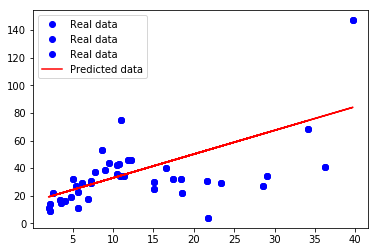

In [6]:
"""Assume linearity. Y = wX + b. Let's use mean squared error as the loss function"""

"""
Simple linear regression example in TensorFlow
"""

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

DATA_FILE = "data/fire_theft.xls"

# Step 1: read in the data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
# data: [[ 6.2 29. ] \n [ 9.5 44. ] \n ... ]
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

# Step 2: create placeholders for input X and label Y
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

# Step 3: create weight and bias, initialized to 0
w = tf.Variable(0.0, name = "weights")
b = tf.Variable(0.0, name = "bias")

# Step 4: construct model to predict Y from the number of fires
Y_predicted = X * w + b

# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name="loss")

# Step 6: use gradient descent with a learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case w and b
    sess.run(tf.global_variables_initializer())
    
    writer = tf.summary.FileWriter('graphs/03/linear_reg')
    
    # Step 8: train the model
    for i in range(100): # run 100 epochs
        total_loss = 0
        for x, y in data:
            # Session runs train_op to minimize loss
            _, l = sess.run([optimizer, loss], feed_dict = {X: x, Y: y})
            total_loss += l
        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))
            
    writer.close()
    
    # Step 9: output the values of w and b
    w_value, b_value = sess.run([w,b])

X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w_value + b_value, 'r', label='Predicted data')
plt.legend()
plt.show()

The code
```
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)
sess.run(optimizer, feed_dict={X: x, Y: y})
```
is not straightforward -

1 Why is train_op in the fetches list of tf.Session.run()

* We can actually pass any TensorFlow ops as fetches in tf.Session.run().

2 How does TensorFlow know what variables to update?
* TensorFlow will execute the part of the graph that those ops depend on. In this case, we see that train_op has the purpose of minimize loss, and loss depends on variables w and b.
* By default, the optimizer trains all the trainable variables that the objective functions depends on. If you do not want to train a variable, set trainable=False when you declare a variable. One example of a variable you don't want to train is global_step, a variable to keep track of how many times you've run your model.**

```
global_step = tf.Variable(0, trainable=False, dtype=tf.int32)
learning_rate = 0.01 * 0.99 ** tf.cast(global_step, tf.float32)

increment step = global_step.assign_add(1)
optimizer = tf.GradientDescentOptimizer(learning_rate) # learning rate can be a tensor
```

You can ask optimizer to take gradients of specific variables 
and also modify the gradients computed by your optimizer

```
#create an optimizer.
optimizer = GradientDescentOptimizer(learning_rate=0.1)

# compute the gradients for a list of variables
grads_and_vars = opt.compute_gradients(loss, <list of variables>)

# grads_and_vars is a list of tuples (gradient, variable). Do what you 
# need to the 'gradient' part, for example, subtract each of them by 1.
subtracted_grads_and_vars = [(gv[0] - 1.0, gv[1]) for gv in grads_and_vars]

# ask the optimizer to apply the subtracted gradients.
optimizer.apply_gradients(subtracted_grads_and_vars)
```

**More on computing gradients**

The optimizer classes automatically compute derivs. on your graph, but creators of new optimizers can call the lower-level functions below.

```
tf.gradients(ys, xs, grad_ys=None, name='gradients', colocate_gradients_with_ops=False, gate_gradients=False, aggregation_method=None)
```

This method constructs symbolic partial derivatives of the sum of y's w.r.t. x in x's. y's and x's are each a Tensor or list of tensors. grad_y's is a list of Tensors, holding the gradients received by the ys. The list must be the same length as the y's.

TensorFlow supports many optimizers...
TL;DR: Use AdamOptimizer

**Logistic Regression in TensorFlow**

In [8]:
from tensorflow.examples.tutorials.mnist import input_data
# Step 1: Read in data
# using TF Learn's built-in function to load MNIST data to the folder data/mnist
MNIST = input_data.read_data_sets("data/mnist", one_hot=True)
# One hot encoding is like 0001000000

Extracting data/mnist/train-images-idx3-ubyte.gz
Extracting data/mnist/train-labels-idx1-ubyte.gz
Extracting data/mnist/t10k-images-idx3-ubyte.gz
Extracting data/mnist/t10k-labels-idx1-ubyte.gz


In [9]:
import time
import numpy as np
import tensorflow as tf

# Step 2: Define parameters for the model
learning_rate = 0.01
batch_size = 128
n_epochs = 25

# Step 3: Create placeholders for features and labels
# Each image in the MNIST data is 28*28 = 784
# Therefore, each image is represented by a 1x784 tensor
# There are 10 classes for each image, corresponding to 0-9
# Each label is a one-hot vector
X = tf.placeholder(tf.float32, [batch_size, 784], name='X_placeholder')
Y = tf.placeholder(tf.float32, [batch_size, 10], name='Y_placeholder')

# Step 4: Create weights and bias
# w is intialized to random variables with mean of 0 and stddev of 0.01
# b is initialized to 0
# The shape of w depends on the dimension of X and Y so that Y = tf.matmul(X, w)
# The shape of b depends on Y
w = tf.Variable(tf.random_normal(shape = [784, 10], stddev = 0.01), name = "weights")
b = tf.Variable(tf.zeros([1, 10]), name = "bias")

# Step 5: Predict Y from X and w, b
# The model returns the probability distribution of possibles labels of the image
# through the softmax layer: a batch_size x 10 tensor that represents the probabilities
# of the digits.
logits = tf.matmul(X, w) + b

# Step 6: Define loss function
# Use softmax cross-entropy with logits as the loss function
# Compute mean cross-entropy, softmax is applied internally
entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y, name='loss')
loss = tf.reduce_mean(entropy) # Computes the mean over examples in the batch

# Step 7: Define training op
# using gradient descent with learn rate = 0.01 to minimize cost
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    writer = tf.summary.FileWriter('graphs/03/logistic_reg')
    
    start_time = time.time()
    sess.run(init)
    n_batches = int(MNIST.train.num_examples/batch_size)
    for i in range(n_epochs): # Train the model n_epochs times
        total_loss = 0
        
        for _ in range(n_batches):
            X_batch, Y_batch = MNIST.train.next_batch(batch_size)
            _, loss_batch = sess.run([optimizer, loss], feed_dict = {X: X_batch, Y:Y_batch})
            total_loss += loss_batch
        print("Average loss epoch {0}: {1}".format(i, total_loss/n_batches))
        
    print("Total time: {0} seconds".format(time.time() - start_time))
    print("Optimization finished")
    
    # Test the model
    n_batches = int(MNIST.test.num_examples/batch_size)
    total_correct_preds = 0
    for i in range(n_batches):
        X_batch, Y_batch = MNIST.test.next_batch(batch_size)
        # We are calling the optimizer on the test data, so we overfit the test data here...
        _, loss_batch, logits_batch = sess.run([optimizer, loss, logits], feed_dict = {X: X_batch, Y: Y_batch})
        preds = tf.nn.softmax(logits_batch)
        correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_batch, 1))
        # Similar to numpy.count_nonzero(boolarray)
        accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))
        total_correct_preds += sess.run(accuracy)
    print("Accuracy {0}".format(total_correct_preds/MNIST.test.num_examples))
    
    writer.close()
    
# Average loss should be around 0.35 after 25 epochs

Average loss epoch 0: 1.2901001055757482
Average loss epoch 1: 0.7330171893804501
Average loss epoch 2: 0.6002440593598328
Average loss epoch 3: 0.5367404280842601
Average loss epoch 4: 0.4981336754101973
Average loss epoch 5: 0.47088863042406826
Average loss epoch 6: 0.4510021991940923
Average loss epoch 7: 0.43620179562301903
Average loss epoch 8: 0.42412465664890264
Average loss epoch 9: 0.4131479959387879
Average loss epoch 10: 0.4043766434514995
Average loss epoch 11: 0.39604608770155963
Average loss epoch 12: 0.39035088032275644
Average loss epoch 13: 0.3845526687193028
Average loss epoch 14: 0.37929321241962327
Average loss epoch 15: 0.37463911277152995
Average loss epoch 16: 0.37144154278965263
Average loss epoch 17: 0.36628322879890185
Average loss epoch 18: 0.3622230695330457
Average loss epoch 19: 0.36032989503064633
Average loss epoch 20: 0.35510626911144433
Average loss epoch 21: 0.3551364885274069
Average loss epoch 22: 0.3516883894210651
Average loss epoch 23: 0.34910756